# 제주 핫플레이스 지도에 표시하기

## 1. 데이터 준비

In [ ]:
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]

Saving 제주핫플레이스.csv to 제주핫플레이스.csv


In [ ]:
import pandas as pd
raw_df = pd.read_csv(filename)
raw_df.head()

,content,date,like,place,tags
0,더 늦기전에 제주도로 떠나쟈😍.#제주핫플레이스 간단히 1탄 모아봄!#제주여행 요 필...,2018-12-07,"1,402",NaN,"['#제주핫플레이스', '#제주여행', '#제주여행', '#제주도여행', '#제주가..."
1,12월에 제주도를 가야하는이유🍊.#제주핫플 모음 끝판왕😍이거 하나면 겨울 #제주여행...,2018-12-03,368,NaN,"['#제주핫플', '#제주여행', '#제주', '#제주도', '#제주도맛집', '#..."
2,11월 놓치지 말아야 할 제주 관광.가을바람이 최고조에 이르는 11월추운 겨울을 앞...,2018-11-02,166,NaN,"['#honestin', '#어니스틴', '#제주여행', '#제주', '#제주도',..."
3,국민학교세대#제주관광#제주살이#제주이주민#아라동주민#삼남매집 #새해첫날#드라이브#명...,2019-01-01,28,명월국민학교,"['#제주관광', '#제주살이', '#제주이주민', '#아라동주민', '#삼남매집'..."
4,#제주관광 #제주 #돔나이트 #스트레스 #풀자 #춤추며 #땀날려 #가끔은괜찮아 #인...,2019-01-01,12,NaN,"['#제주관광', '#제주', '#돔나이트', '#스트레스', '#풀자', '#춤추..."


In [ ]:
location_counts = raw_df.place.value_counts().to_frame()
print(location_counts.shape)
location_counts.head()

(1027, 1)


,place
Jeju,241
Jeju-do,172
Jungle Book by Alice,101
Seogwipo,65
제주도 크리스마스 박물관,59


In [ ]:
location_counts.tail()

,place
로드129,1
외도동,1
소렉,1
우진해장국,1
사락,1


In [ ]:
location_counts.to_csv('location_counts.csv')

In [ ]:
loc_df = pd.read_csv('location_counts.csv')
loc_df.columns = ['지명', '빈도']
loc_df.head()

,지명,빈도
0,Jeju,241
1,Jeju-do,172
2,Jungle Book by Alice,101
3,Seogwipo,65
4,제주도 크리스마스 박물관,59


## 2. 카카오 검색 api를 이용한 지도 검색

In [ ]:
uploaded = files.upload()
filename = list(uploaded.keys())[0]

Saving kakaoapikey.txt to kakaoapikey.txt


In [ ]:
with open(filename) as f:
    api_key = f.read()


In [ ]:
import requests
from urllib.parse import quote
import numpy as np

In [ ]:
keyword = '제주 여행'
search_url = 'https://dapi.kakao.com/v2/local/search/keyword.json'
url = f'{search_url}?query={quote(keyword)}'
# Authorization: KakaoAK {REST_API_KEY}
result = requests.get(url,
            headers={"Authorization": f'KakaoAK {api_key}'}).json()
result

{'documents': [{'address_name': '제주특별자치도 서귀포시 서귀동 316-1',
   'category_group_code': 'AT4',
   'category_group_name': '관광명소',
   'category_name': '여행 > 관광,명소 > 도보여행 > 올레길 > 제주올레길',
   'distance': '',
   'id': '11635431',
   'phone': '',
   'place_name': '올레길 7코스(서귀포-월평 올레)',
   'place_url': 'http://place.map.kakao.com/11635431',
   'road_address_name': '제주특별자치도 서귀포시 중정로 22',
   'x': '126.51530966206293',
   'y': '33.23738579332568'},
  {'address_name': '제주특별자치도 서귀포시 보목동',
   'category_group_code': 'AT4',
   'category_group_name': '관광명소',
   'category_name': '여행 > 관광,명소 > 도보여행 > 올레길 > 제주올레길',
   'distance': '',
   'id': '8015963',
   'phone': '',
   'place_name': '올레길 6코스(쇠소깍-서귀포 올레)',
   'place_url': 'http://place.map.kakao.com/8015963',
   'road_address_name': '',
   'x': '126.59230607000688',
   'y': '33.24127212174994'},
  {'address_name': '제주특별자치도 서귀포시 성산읍 시흥리',
   'category_group_code': 'AT4',
   'category_group_name': '관광명소',
   'category_name': '여행 > 관광,명소 > 도보여행 > 올레길 > 제주올레길',


In [ ]:

def find_place(keyword):
    url = f'{search_url}?query={quote(keyword)}'
    result = requests.get(url,
                headers={"Authorization": f'KakaoAK {api_key}'}).json()
    try:
        name = result['documents'][0]['place_name']
        lng = float(result['documents'][0]['x'])     # 경도 longitude
        lat = float(result['documents'][0]['y'])     # 위도 latitude
    except:
        print(keyword)
        name = ''
        lng = np.nan
        lat = np.nan

    return name, lng, lat, keyword

In [ ]:
# 제주특별자치도 미포함
def find_place(keyword):
    url = f'{search_url}?query={quote(keyword)}'
    result = requests.get(url,
                headers={"Authorization": f'KakaoAK {api_key}'}).json()
    try:
        name = result['documents'][0]['place_name']
        if '제주특별자치도' not in : result['documents'][0]['place_name']
          lng = np.nan
          lat = np.nan
        else:  
          lng = float(result['documents'][0]['x'])     # 경도 longitude
          lat = float(result['documents'][0]['y'])     # 위도 latitude
    except:
        print(keyword)
        name = ''
        lng = np.nan
        lat = np.nan

    return name, lng, lat, keyword

In [ ]:
find_place('제주공항')

('제주국제공항', '126.492769004244', '33.5070789578184', '제주공항')

In [ ]:
import re
re.sub('[^ㄱ-ㅎ ㅏ-ㅣ 가-힣0-9]', '', '제주도 서귀포 중문관광단지 濟州島西歸浦中文觀光團地')

'제주도 서귀포 중문관광단지 '

In [ ]:
# loc_df에 공식명칭, 위도, 경도 정보 추가
name_list, lng_list, lat_list = [],[],[]
for place in loc_df.지명:
    place = re.sub('[^가-힣0-9]', '', place.strip())
    if place:
        name, lng, lat, _ = find_place(place)
    else:
        name, lng, lat = '', np.nan, np.nan

    name_list.append(name)
    lng_list.append(lng)
    lat_list.append(lat)

제주고궁한복카페
위미2리동백군락지
제주꿈꾸는고래스쿠버게스트하우스
제주성산신산포구자연산횟집회포장
아날로그감귤체험
함덕반하다
성산일출봉게스트하우스파티띵까게스트하우스
해발1950한라산백록담
스윗슬로
쌀다방
붉은못허브팜애월본점
윗세오름해발1700
2월22일브런치카페
제스토리바이제주제주감성소품
비브레이브커피로스터즈
제주조류공원화조원
빨간모자마법사
애월해안가
제주서귀포그릴데미그라스
제주아트리움비밀의그림자공연
평화통일불사리탑사
비양도해녀촌
돈테일러익스프레
블루마린하우스
카페하도섬
유리의성과마법의숲
8월의크리스마스초원사진관
인공위성제주
제주도올레길6코스이중섭거리
중문마린파크퍼시픽랜드
곽지스테이션
목수금토일
새별오름정상
제주초가집곱들락
제주도하늘위
제주도가는비행기안
오샹띠
큰엉전망대쉼터
성산일출봉코앞쉼터
미나마라
바굥식당
섶섬해녀할망카페
모던플레이스리조트
오마주마카롱
카페하도섬엠스테이펜션
기원뚝배기
군산정상
블루밍아일랜드
제주반디앤로제이펜션플라워브런치카페
미미본가
한라산정상해발1950
포근한우리집
타시텔레
제주마라도잠수함
새우조나단
다만프레르제주신화점
홍대깐풍기브라더스
풍원한라산볶음밥
서귀동2985세계의가정식
네이처캔바스
정방폭포가보이는암벽위
키아스마
원더먼트제주
의한모신의한모
빌리엔젤제주노형점
몽구네민박
성산수구레국밥
호끌락80번지
미풍해장국중앙점
제주카페스르륵
라비에와인비스트로
테라로사이사랑
블랙하우스떡볶이레스토랑
한화아쿠아넷
머스태쉬커피머스태쉬하우스
여수앞바다
카페바띠
유민아르누보콜렉션
더커피브루
제주신화월드메리어트리조트관
소자38
접대저번에우리가만났던그때
선화동1061
헤이미쉬제주제주독채펜션
김녕앞바다
목포고을제주도흑돼지끝나는맛
유채꽃사진촬영소
건축카페섶섬이보이는
백리향백반
카페모리베이커스트리트
해물뚝배기전문재암식당
동탄2에산다
릴리펏제주점메종글래드호텔
한복입는선흘집
기쁨이네감자탕
협제혜변
핸드테일러제주점
몽키비치
알뜨르프로젝트2018
단디501
청초수물회섭국신관
저녁정원


In [ ]:
loc_df['공식명칭'] = name_list
loc_df['위도'] = lat_list
loc_df['경도'] = lng_list
loc_df.head()

,지명,빈도,공식명칭,위도,경도
0,Jeju,241,,NaN,NaN
1,Jeju-do,172,,NaN,NaN
2,Jungle Book by Alice,101,,NaN,NaN
3,Seogwipo,65,,NaN,NaN
4,제주도 크리스마스 박물관,59,바이나흐튼 크리스마스박물관,33.291572,126.327858


In [ ]:
# Null 데이터 유무 확인
loc_df.isnull().sum()

지명        0
빈도        0
공식명칭      0
위도      197
경도      197
dtype: int64

In [ ]:
loc_df.isna().sum()

지명        0
빈도        0
공식명칭      0
위도      197
경도      197
dtype: int64

In [ ]:
# Null 데이터 삭제
total_df = loc_df.dropna()          # Null 값이 있는 행을 삭제
total_df.isnull().sum().sum()

0

In [ ]:
total_df.head()

,지명,빈도,공식명칭,위도,경도
4,제주도 크리스마스 박물관,59,바이나흐튼 크리스마스박물관,33.291572,126.327858
5,제주에인감귤밭,48,제주에인감귤밭,33.256561,126.539014
7,성산일출봉 城山日出峰 Seongsan Ilchulbong,36,성산일출봉,33.459135,126.940538
8,폼포코식당_pompokokitchen,30,폼포코식당,33.450408,126.919065
9,1100고지,25,한라산1100고지,33.358078,126.462220


In [ ]:
# 공식명칭 중복여부
df.공식명칭.value_counts()[:10]

크랩잭 제주       1
지붕위제주바다      1
제주맑음         1
세화해변         1
호텔시리우스       1
뽈살집 한림점      1
만세국수 삼성혈점    1
카이로스         1
성산포항         1
아바이마을        1
Name: 공식명칭, dtype: int64

In [ ]:
df = total_df.pivot_table(index=['공식명칭','위도','경도'], values='빈도', aggfunc='sum')
df.head()

,,,빈도
공식명칭,위도,경도,
1158족욕카페,33.467075,126.336504,1
40계단,35.103911,129.034571,1
702키친,33.498835,126.534134,1
CU 수원광장점,37.268151,127.000311,1
KT 브로 라페스타점,37.662346,126.767821,1


In [ ]:
df.reset_index(inplace=True)
df.공식명칭.value_counts()[:5]

크랩잭 제주      1
나주혁신도시      1
뽈살집 한림점     1
해녀엄마의집      1
제주중문관광단지    1
Name: 공식명칭, dtype: int64

In [ ]:
df.to_csv('공식명칭.csv', index=False)

## 4. folium 지도 시각화

### 1) 개별 표시

In [ ]:
df.sort_values(by='빈도',ascending=False, inplace=True)
df.head(10)

,공식명칭,위도,경도,빈도
231,바이나흐튼 크리스마스박물관,33.291572,126.327858,59
541,제주에인감귤밭,33.256561,126.539014,48
320,성산일출봉,33.459135,126.940538,38
665,폼포코식당,33.450408,126.919065,30
692,한라산1100고지,33.358078,126.462220,25
475,위미동백나무군락,33.272939,126.674731,24
473,월정리해수욕장,33.556469,126.795805,22
447,올레길 7코스(서귀포-월평 올레),33.237386,126.515310,21
29,고집돌우럭 중문점,33.257981,126.416705,21
725,협재해수욕장,33.393866,126.239158,20


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48712 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48712 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0, flags=flags)


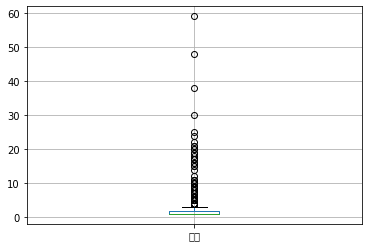

In [ ]:
df[['빈도']].boxplot()

In [ ]:
import folium

In [ ]:
df.head()

,공식명칭,위도,경도,빈도
231,바이나흐튼 크리스마스박물관,33.291572,126.327858,59
541,제주에인감귤밭,33.256561,126.539014,48
320,성산일출봉,33.459135,126.940538,38
665,폼포코식당,33.450408,126.919065,30
692,한라산1100고지,33.358078,126.462220,25


In [ ]:
type(df.빈도[0])

numpy.int64

In [ ]:
Mt_Hanla = [33.3625, 126.533694]
map = folium.Map(location=Mt_Hanla, zoom_start=11)

for i in df.index:
        folium.CircleMarker(
        radius=int(df.빈도[i]),               # int64는 처리 불가
        location=[df.위도[i], df.경도[i]],    # 위도, 경도
        popup=folium.Popup(df.공식명칭[i], max_width=200),
        tooltip=df.공식명칭[i],
        color='#3186cc'

    ).add_to(map)
map

In [ ]:
map.save('제주도 핫 플레이스(개별).html')

### 2) 그룹으로 표시

In [ ]:
from folium.plugins import MarkerCluster

In [ ]:
locations = []
names = []
for i in df.index:
  locations.append([df.위도[i], df.경도[i]])
  names.append(df.공식명칭[i])

In [ ]:
map = folium.Map(location=Mt_Hanla, zoom_start=11)
MarkerCluster(
    locations=locations, popups=names,
    name='제주', overlay=True, control=True
).add_to(map)
map

In [ ]:
map.save('제주도 핫 플레이스(그룹).html')